##Osnove strojnega ucenja

In [0]:
import pandas as pd

df_osnovni = pd.read_csv("drive/My Drive/FERI/MAG/TRIR/Data/happiness_oecd.csv", sep=";", decimal=",")
df_osnovni.shape
for col in df_osnovni.columns:
  if col != "Region" and col != "Country":
    df_osnovni[col] = pd.to_numeric(df_osnovni[col])
df_osnovni.dtypes
df_osnovni.shape
df_osnovni.isna().sum()

Country                                                              0
Happiness.Rank                                                       0
Happiness.Score                                                      0
Economy..GDP.per.Capita.                                             0
Family                                                               0
Health..Life.Expectancy.                                             0
Freedom                                                              0
Generosity                                                           0
Trust..Government.Corruption.                                        0
Dystopia.Residual                                                    0
Region                                                               0
Happiness Rank 2016                                                  0
Happiness Score 2016                                                 0
Happiness Rank 2015                                                  0
Happin

In [0]:
df = df_osnovni[['Happiness.Score', 'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.']]

###Regresija

#### 1
###### Množico razdelite na train in test (seveda ločeno na vhod in izhod) tako, da bo testna množica velika 25% vseh in bo random_state=789.

Pri tem naj bo izhod 'Happiness.Score', vhod pa 'GDP.per.Capita', 'Life.Expectancy', 'Freedom', 'Government.Corruption'.

In [0]:
from sklearn.model_selection import train_test_split

vhod = ['Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.']
izhod = 'Happiness.Score'

x_train, x_test, y_train, y_test = train_test_split(df[vhod], df[izhod], test_size=0.25, random_state=789)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(126, 4) (126,) (42, 4) (42,)


#### 2
###### Uporabite spodnje tri regresijske metode, jih naučite na učnih podatkih  in napovejte rezultat za testno množico:


*   Linearno regresijo
*   Regresijska drevesa
*   Regresijo z linearno metodo podpornih vektorjev

*Linearna regresija*

In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lr_outcome = lr.predict(x_test)
lr_outcome

array([5.35558371, 5.0755896 , 5.79944068, 6.35348718, 3.61851483,
       5.57903988, 4.19554448, 6.80036367, 4.0050289 , 3.94297483,
       3.06760645, 4.69491559, 5.49975495, 5.35183854, 5.39439159,
       6.77251005, 4.00399053, 5.80248561, 6.08663671, 6.6530803 ,
       5.35632381, 5.43379958, 5.43162439, 3.86935391, 4.27294129,
       5.90157328, 6.0383744 , 3.98241729, 5.45900514, 5.17107227,
       5.08504611, 6.70052914, 5.41241202, 3.8299804 , 5.35632381,
       6.5112736 , 5.29752621, 5.53417517, 5.7819219 , 6.88579306,
       3.87211051, 6.96283098])

*Regresijska drevesa*

In [0]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
dtr_outcome = dtr.predict(x_test)
dtr_outcome

array([5.23500013, 5.23400021, 6.08400011, 6.97700024, 3.79500008,
       5.23500013, 3.53299999, 7.079     , 3.80800009, 3.60299993,
       4.28000021, 4.53499985, 5.8499999 , 5.5250001 , 4.80499983,
       7.46899986, 3.60299993, 5.32399988, 6.454     , 6.71400023,
       5.35401936, 5.23500013, 4.95499992, 4.28000021, 3.93600011,
       5.97300005, 6.60900021, 3.60299993, 5.35401936, 5.23400021,
       5.07399988, 6.95100021, 5.62900019, 3.49499989, 5.35401936,
       6.71400023, 5.18100023, 5.62900019, 6.0079999 , 5.92000008,
       3.53299999, 7.31400013])

*Regresija z linearno metodo podpornih vektorjev*

In [0]:
from sklearn.svm import LinearSVR

svr = LinearSVR()
svr.fit(x_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
svr_outcome = svr.predict(x_test)
svr_outcome

array([5.32709271, 5.10846256, 5.8203158 , 6.31564264, 3.6269187 ,
       5.53916762, 4.17476674, 6.8564832 , 3.96705497, 3.86523954,
       3.05925372, 4.61042947, 5.54911271, 5.32184409, 5.46512372,
       6.76964105, 4.06516014, 5.7726384 , 6.05147927, 6.70901504,
       5.35401936, 5.39471729, 5.4521468 , 3.79494556, 4.21193463,
       5.87492961, 6.07149107, 3.9308966 , 5.45409885, 5.21405362,
       5.02996988, 6.7398134 , 5.46617652, 3.90262153, 5.35401936,
       6.54750561, 5.20818441, 5.54529028, 5.7391936 , 6.9834821 ,
       3.8439366 , 7.0436308 ])

#### 3
###### Naredite pandas DataFrame, kjer bo prvi stolpec dejanska vrednost napovedanih podatkov, drugi stolpec bodo rezultati linearne regresije, tretji stolpec bodo rezultati regresijskega drevesa, četrti stolpec pa naj bodo rezultati regresije z metodo podpornih vektorjev.

In [0]:
df_final = pd.DataFrame(list(zip(y_test, lr_outcome, dtr_outcome, svr_outcome)), columns = ['Happiness.Score', 'Linear regression', 'Decision Tree Regression', 'LinearSVR'])
df_final

,Happiness.Score,Linear regression,Decision Tree Regression,LinearSVR
0,6.003000,5.355584,5.235000,5.327093
1,4.465000,5.075590,5.234000,5.108463
2,6.578000,5.799441,6.084000,5.820316
3,5.758000,6.353487,6.977000,6.315643
4,3.591000,3.618515,3.795000,3.626919
5,6.357000,5.579040,5.235000,5.539168
6,3.593000,4.195544,3.533000,4.174767
7,7.377000,6.800364,7.079000,6.856483
8,4.190000,4.005029,3.808000,3.967055
9,4.028000,3.942975,3.603000,3.865240


#### 4
###### Izpišite prvih 10 vrstic tega DataFrame-a in izpišite opis tega DataFrame-a.

In [0]:
df_final.head(10)

,Happiness.Score,Linear regression,Decision Tree Regression,LinearSVR
0,6.003,5.355584,5.235,5.327093
1,4.465,5.075590,5.234,5.108463
2,6.578,5.799441,6.084,5.820316
3,5.758,6.353487,6.977,6.315643
4,3.591,3.618515,3.795,3.626919
5,6.357,5.579040,5.235,5.539168
6,3.593,4.195544,3.533,4.174767
7,7.377,6.800364,7.079,6.856483
8,4.190,4.005029,3.808,3.967055
9,4.028,3.942975,3.603,3.865240


In [0]:
df_final.describe()

,Happiness.Score,Linear regression,Decision Tree Regression,LinearSVR
count,42.000000,42.000000,42.000000,42.000000
mean,5.281239,5.290457,5.297073,5.288855
std,1.210813,1.016176,1.154523,1.036130
min,2.905000,3.067606,3.495000,3.059254
25%,4.287500,4.378435,4.343750,4.311558
50%,5.354019,5.403402,5.279500,5.423432
75%,5.993000,5.876801,5.999250,5.861276
max,7.504000,6.962831,7.469000,7.043631


#### 5
###### Za vsako izmed teh metod izpišite sledeče tri metrike regresije:

In [0]:
from sklearn import metrics

lr_mae = metrics.mean_absolute_error(lr_outcome, y_test)
lr_mse = metrics.mean_squared_error(lr_outcome, y_test)
lr_r2 = metrics.r2_score(lr_outcome, y_test)

print('Linear regression\n')
print('Mean absolute error: ', lr_mae)
print('Mean squared error: ', lr_mse)
print('R2 score: ', lr_r2)

Linear regression

Mean absolute error:  0.44562974242144165
Mean squared error:  0.32797606080449865
R2 score:  0.6746357214361793


In [0]:
dtr_mae = metrics.mean_absolute_error(dtr_outcome, y_test)
dtr_mse = metrics.mean_squared_error(dtr_outcome, y_test)
dtr_r2 = metrics.r2_score(dtr_outcome, y_test)

print('Decision tree regression\n')
print('Mean absolute error: ', dtr_mae)
print('Mean squared error: ', dtr_mse)
print('R2 score: ', dtr_r2)

Decision tree regression

Mean absolute error:  0.4929766246250712
Mean squared error:  0.412315607416423
R2 score:  0.6831235209169432


In [0]:
svr_mae = metrics.mean_absolute_error(svr_outcome, y_test)
svr_mse = metrics.mean_squared_error(svr_outcome, y_test)
svr_r2 = metrics.r2_score(svr_outcome, y_test)

print('SVR\n')
print('Mean absolute error: ', svr_mae)
print('Mean squared error: ', svr_mse)
print('R2 score: ', svr_r2)

SVR

Mean absolute error:  0.44552102568223534
Mean squared error:  0.3350357867845438
R2 score:  0.6803103983016667


#### 6
###### Izrišite stolpični graf, kjer bo vsak stolpec prikazoval rezultate srednje kvadratne napake za vsako izmed treh metod.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

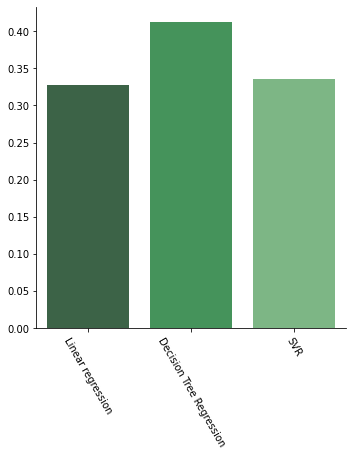

In [0]:
import seaborn as sns
from matplotlib import pyplot as plt

temp = pd.DataFrame([[lr_mse, dtr_mse, svr_mse]], columns = ['Linear regression', 'Decision Tree Regression', 'SVR'])
temp

sns.catplot(data = temp, kind='bar', palette='Greens_d')

plt.xticks(rotation=-60)

### Klasifikacija

#### 7
###### Izhod podatkov naj bo regija države, vhod pa naj bodo 'Happiness.Score', 'GDP.per.Capita', 'Life.Expectancy', 'Freedom', 'Government.Corruption'.

In [0]:
df['Region'] = df_osnovni['Region']

c_input = ['Happiness.Score', 'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.']
c_output = 'Region'

df_input = df[c_input]
df_output = df[[c_output]]
print(df.shape, df_input.shape, df_output.shape)

(168, 6) (168, 5) (168, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 8 
###### Uporabite spodnje klasifikacijske metode:
*   Logisticna regresija
*   Linearna metoda podpornih vektorjev
*   K najblizjih sosedov
*   Naivni Bayes z Gaussovo porazdelitvijo
*   Odlocitveno drevo
*   Nakljucni gozd (Random forest)
*   Ekstremni gozd (Extra trees)
*   AdaBoost
*   Gradient Tree Boosting



In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

classificators = []

classificators.append(LogisticRegression())
classificators.append(LinearSVC())
classificators.append(KNeighborsClassifier())
classificators.append(GaussianNB())
classificators.append(DecisionTreeClassifier())
classificators.append(RandomForestClassifier())
classificators.append(ExtraTreesClassifier())
classificators.append(AdaBoostClassifier())
classificators.append(GradientBoostingClassifier())

#### 9
###### Pri klasifikaciji uporabite stratificirano navzkrižno validacijo s petimi rezi, random state=789 in z optimizacijo metrike točnosti.

#### 10
###### Za vsak rezultat rezultate izpišite v konzolo.

In [0]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    df = pd.DataFrame(columns=['Classificator', 'Accuracy'])
    array = []

    for classificator in classificators:
      kfold = StratifiedKFold(n_splits = 5, random_state = 789)
      cv = cross_val_score(classificator, df_input, df_output, cv = kfold, scoring = 'accuracy')

      array.append([type(classificator).__name__, cv.mean()])

In [0]:
df_classificators = pd.DataFrame(data = array, columns=['Classificator', 'Accuracy'])
df_classificators.head(9)

,Classificator,Accuracy
0,LogisticRegression,0.511943
1,LinearSVC,0.541176
2,KNeighborsClassifier,0.541355
3,GaussianNB,0.558824
4,DecisionTreeClassifier,0.528877
5,RandomForestClassifier,0.606417
6,ExtraTreesClassifier,0.583066
7,AdaBoostClassifier,0.393226
8,GradientBoostingClassifier,0.558645


#### 11
###### Izrišite stolpični graf kjer prikažete rezultate točnosti vsakega klasifikatorja posebej.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

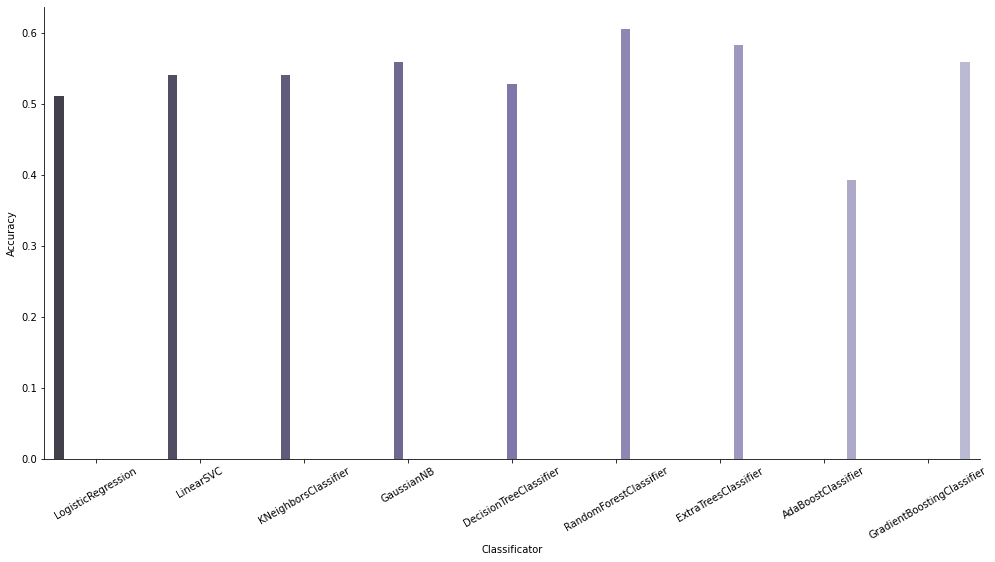

In [0]:
sns.catplot(data = df_classificators, kind='bar', x = 'Classificator', y = 'Accuracy', hue='Classificator', aspect=2, height=7, palette='Purples_d')

plt.xticks(rotation=30)